***
# Imports and Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,5)})

In [4]:
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [49]:
# Start coding here
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
peak_crime_hour=crimes['TIME OCC'].value_counts()
peak_crime_hour.head(10)

TIME OCC
1200    8333
1800    6183
1700    5824
2000    5606
1900    5250
2200    5215
2100    5014
1600    4781
1500    4543
0001    4433
Name: count, dtype: int64

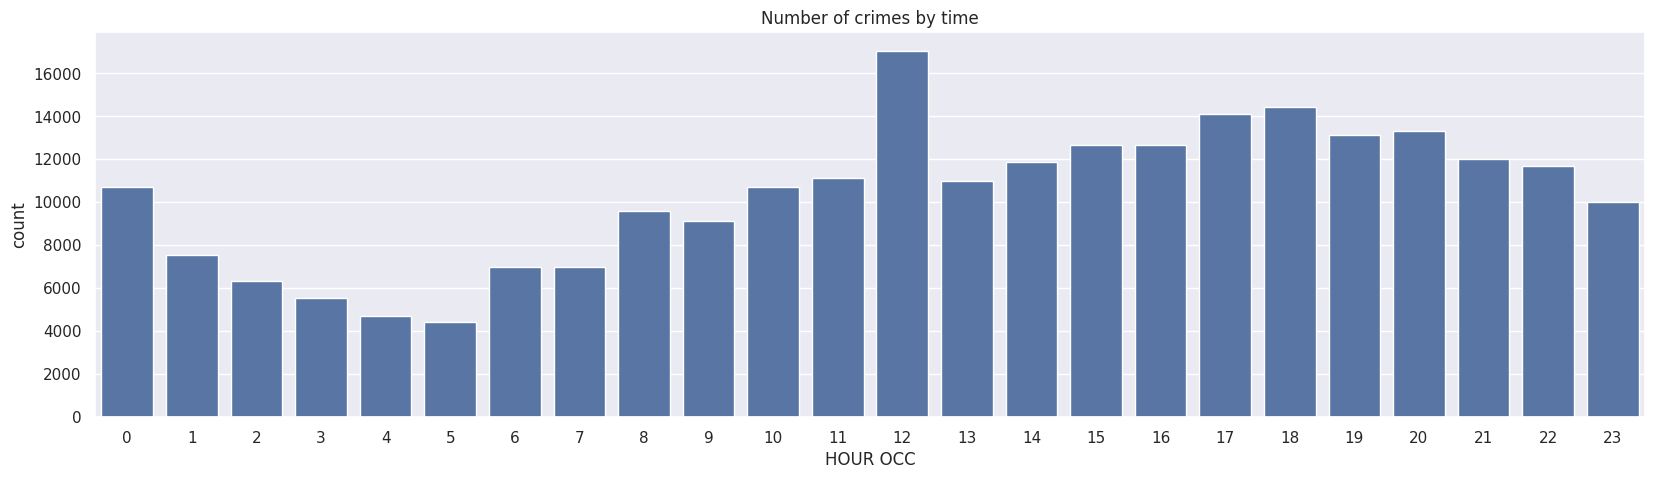

In [20]:
sns.countplot(data=crimes, x="HOUR OCC")
plt.title('Number of crimes by time')
plt.show()

In [25]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

peak_night_crime_location = night_time.groupby("AREA NAME", as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",ascending=False)

print(f"The area with the largest volume of night crime is {peak_night_crime_location.iloc[0]['AREA NAME']}")

The area with the largest volume of night crime is Central


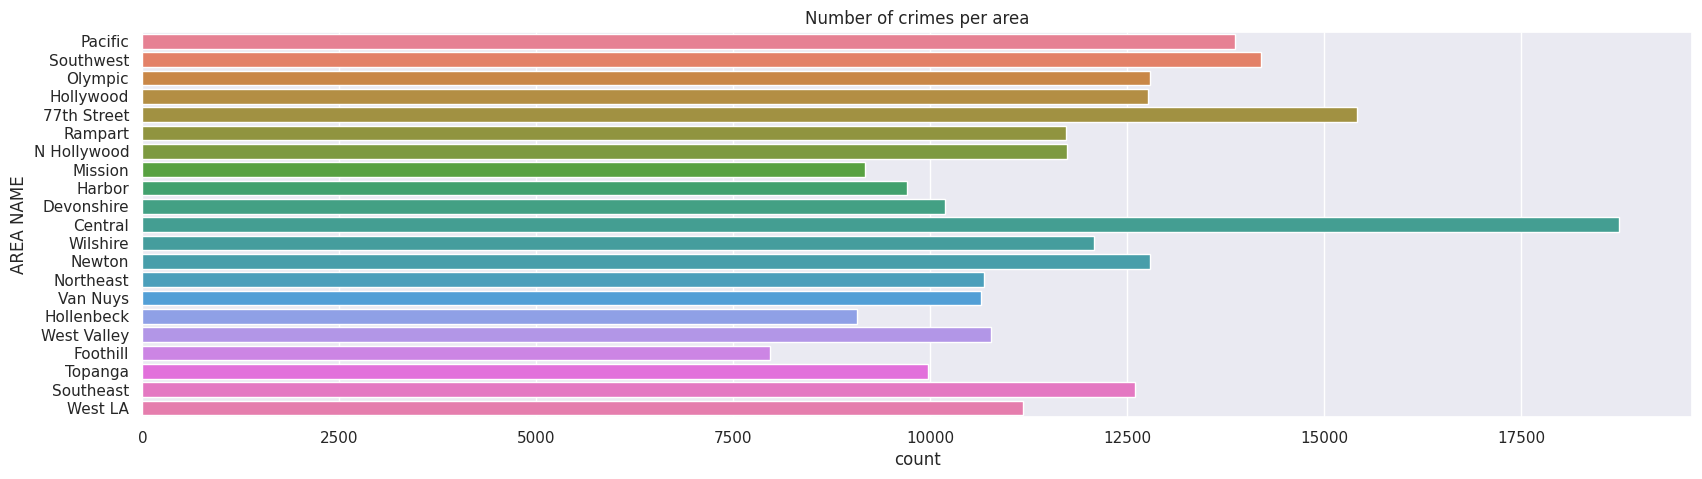

In [35]:
sns.countplot(data=crimes, y='AREA NAME', hue='AREA NAME')
plt.title('Number of crimes per area')
plt.show()

In [45]:
## number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)

victim_ages = pd.DataFrame(crimes["Age Bracket"].value_counts())
victim_ages

,count
Age Bracket,
26-34,47470
35-44,42157
45-54,28353
18-25,28291
55-64,20169
65+,14747
0-17,4528


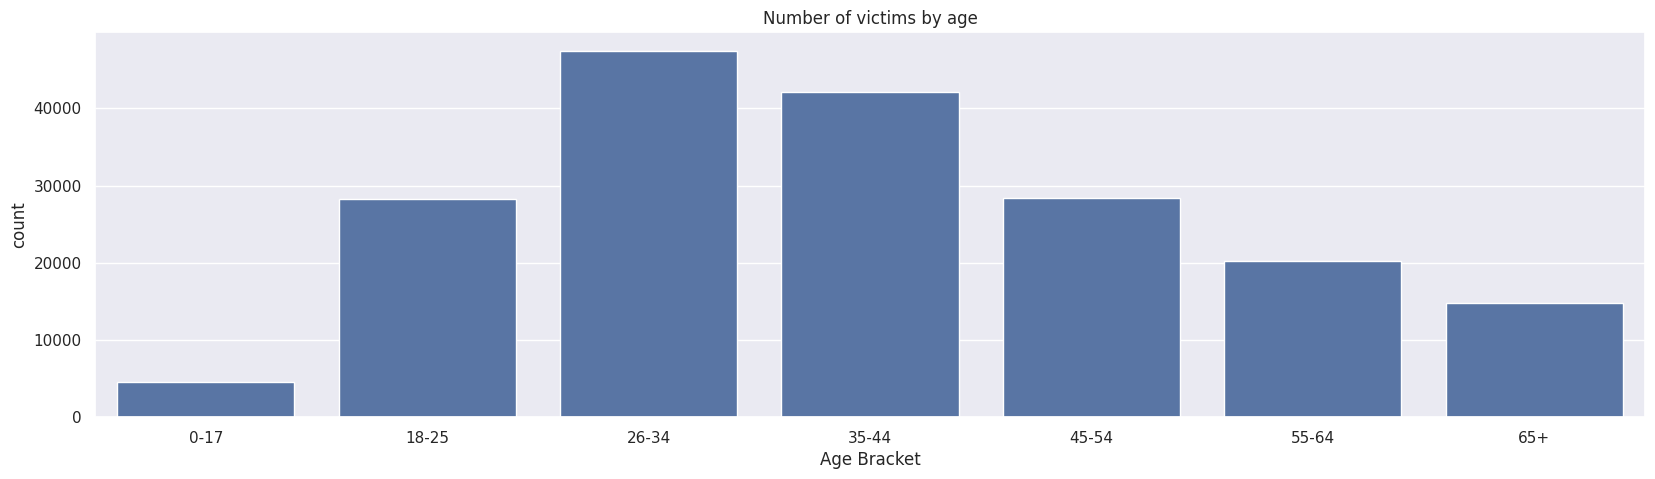

In [47]:
sns.barplot(data=victim_ages, y='count', x=victim_ages.index)
plt.title('Number of victims by age')
plt.show()